In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_excel("linkedin_job_posts_insights.xlsx")
df

,job_title,company_name,location,hiring_status,date,seniority_level,job_function,employment_type,industry
0,Store Business Manager - DAVID JONES CHERMSIDE,M.J. Bale,"Brisbane, Queensland, Australia",Be an early applicant,2023-04-13,Not Applicable,Sales and Business Development,Full-time,Government Administration
1,Full-time,Gatesman,"Chicago, IL",Be an early applicant,2023-03-31,NaN,NaN,NaN,NaN
2,Senior Machine Learning Engineer,Redwolf + Rosch,"Adelaide, South Australia, Australia",Be an early applicant,2023-04-25,Mid-Senior level,Engineering and Information Technology,Part-time,Internet Publishing
3,Senior Data Scientist,Bupa,"Melbourne, Victoria, Australia",Be an early applicant,2023-04-29,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet"
4,\n \n Solution Architect\n ...,\n Xybion Digital\n,"\n Chennai, Tamil Nadu, India\n ...",\n Be an early applicant\n,2023-01-26,\n Mid-Senior level\n,\n Engineering and Information Tech...,\n Full-time\n,"\n IT Services and IT Consulting, Sof..."
...,...,...,...,...,...,...,...,...,...
31592,\n \n Data Analyst (2022-23 ...,\n Unite Career Solutions\n,"\n Nagpur, Maharashtra, India\n ...",Actively Hiring,2023-02-03,\n Entry level\n,\n Information Technology\n,\n Full-time\n,NaN
31593,\n \n Software Developer\n ...,\n OneOme\n,\n Greater Minneapolis-St. Paul Are...,\n Actively Hiring\n,2023-03-09,\n Mid-Senior level\n,\n Information Technology\n,\n Full-time\n,\n Biotechnology Research\n
31594,"Embedded Security Engineer :: Plano, TX",Diverse Lynx,"Plano, TX",Be an early applicant,2023-03-10,Entry level,Information Technology,Full-time,Software Development
31595,Senior Back-end leaning Full-Stack Software En...,Dawson Andrews,"London, England, United Kingdom",Be an early applicant,2023-04-13,Entry level,Engineering and Information Technology,Full-time,Design Services


## Data cleaning

In [140]:
df.duplicated().sum() #finding dubplicates

10693

In [141]:
df.drop_duplicates(inplace=True) #dropping duplicates

In [142]:
df.isnull().sum() #finding number of null values 

job_title            26
company_name        854
location              9
hiring_status         0
date                  0
seniority_level    1213
job_function       1141
employment_type    1142
industry           1441
dtype: int64

In [143]:
df=df.dropna() #dropping null values
df

,job_title,company_name,location,hiring_status,date,seniority_level,job_function,employment_type,industry
0,Store Business Manager - DAVID JONES CHERMSIDE,M.J. Bale,"Brisbane, Queensland, Australia",Be an early applicant,2023-04-13,Not Applicable,Sales and Business Development,Full-time,Government Administration
2,Senior Machine Learning Engineer,Redwolf + Rosch,"Adelaide, South Australia, Australia",Be an early applicant,2023-04-25,Mid-Senior level,Engineering and Information Technology,Part-time,Internet Publishing
3,Senior Data Scientist,Bupa,"Melbourne, Victoria, Australia",Be an early applicant,2023-04-29,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet"
4,\n \n Solution Architect\n ...,\n Xybion Digital\n,"\n Chennai, Tamil Nadu, India\n ...",\n Be an early applicant\n,2023-01-26,\n Mid-Senior level\n,\n Engineering and Information Tech...,\n Full-time\n,"\n IT Services and IT Consulting, Sof..."
5,\n \n Lead Data Scientist\n ...,\n Spinny\n,"\n Gurugram, Haryana, India\n ...",\n Actively Hiring\n,2023-02-24,\n Mid-Senior level\n,\n Information Technology\n,\n Full-time\n,\n Advertising Services\n
...,...,...,...,...,...,...,...,...,...
31585,Data Scientist,Mars,"Slough, England, United Kingdom",Be an early applicant,2023-04-01,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet"
31588,Content Writer,Techinfinity,"Mumbai, Maharashtra, India",Be an early applicant,2023-01-29,Mid-Senior level,"Marketing, Public Relations, and Writing/Editing",Full-time,"Technology, Information and Internet"
31589,\n \n Data Scientist\n ...,\n Joveo\n,"\n Bangalore Urban, Karnataka, Indi...",\n Actively Hiring\n,2023-03-09,\n Mid-Senior level\n,\n Analyst\n,\n Full-time\n,\n Banking and Financial Services\n ...
31593,\n \n Software Developer\n ...,\n OneOme\n,\n Greater Minneapolis-St. Paul Are...,\n Actively Hiring\n,2023-03-09,\n Mid-Senior level\n,\n Information Technology\n,\n Full-time\n,\n Biotechnology Research\n


In [144]:
#formatting columns 

df['company_name']=df['company_name'].str.replace('\n','')
df['job_title']=df['job_title'].str.replace('\n','')
df['hiring_status']=df['hiring_status'].str.replace('\n','')
df['employment_type']=df['employment_type'].str.replace('\n','')
df['location']=df['location'].str.replace('\n','')
df['seniority_level']=df['seniority_level'].str.replace('\n','')
df['job_function']=df['job_function'].str.replace('\n','')
df['industry']=df['industry'].str.replace('\n','')
df['company_name']=df['company_name'].str.replace('[^a-zA-Z ]','')
df

C:\Users\Ritu Vaja\AppData\Local\Temp\ipykernel_24776\1534144267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_name']=df['company_name'].str.replace('\n','')
C:\Users\Ritu Vaja\AppData\Local\Temp\ipykernel_24776\1534144267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_title']=df['job_title'].str.replace('\n','')
C:\Users\Ritu Vaja\AppData\Local\Temp\ipykernel_24776\1534144267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

,job_title,company_name,location,hiring_status,date,seniority_level,job_function,employment_type,industry
0,Store Business Manager - DAVID JONES CHERMSIDE,MJ Bale,"Brisbane, Queensland, Australia",Be an early applicant,2023-04-13,Not Applicable,Sales and Business Development,Full-time,Government Administration
2,Senior Machine Learning Engineer,Redwolf Rosch,"Adelaide, South Australia, Australia",Be an early applicant,2023-04-25,Mid-Senior level,Engineering and Information Technology,Part-time,Internet Publishing
3,Senior Data Scientist,Bupa,"Melbourne, Victoria, Australia",Be an early applicant,2023-04-29,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet"
4,Solution Architect ...,Xybion Digital,"Chennai, Tamil Nadu, India",Be an early applicant,2023-01-26,Mid-Senior level,Engineering and Information Techno...,Full-time,"IT Services and IT Consulting, Softw..."
5,Lead Data Scientist ...,Spinny,"Gurugram, Haryana, India",Actively Hiring,2023-02-24,Mid-Senior level,Information Technology,Full-time,Advertising Services
...,...,...,...,...,...,...,...,...,...
31585,Data Scientist,Mars,"Slough, England, United Kingdom",Be an early applicant,2023-04-01,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet"
31588,Content Writer,Techinfinity,"Mumbai, Maharashtra, India",Be an early applicant,2023-01-29,Mid-Senior level,"Marketing, Public Relations, and Writing/Editing",Full-time,"Technology, Information and Internet"
31589,Data Scientist ...,Joveo,"Bangalore Urban, Karnataka, India ...",Actively Hiring,2023-03-09,Mid-Senior level,Analyst,Full-time,Banking and Financial Services ...
31593,Software Developer ...,OneOme,Greater Minneapolis-St. Paul Area ...,Actively Hiring,2023-03-09,Mid-Senior level,Information Technology,Full-time,Biotechnology Research


In [145]:
#removing blank spaces

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.strip()
df['employment_type'] = df['employment_type'].str.replace('Employment type', '').str.strip()

C:\Users\Ritu Vaja\AppData\Local\Temp\ipykernel_24776\3681994107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.strip()
C:\Users\Ritu Vaja\AppData\Local\Temp\ipykernel_24776\3681994107.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employment_type'] = df['employment_type'].str.replace('Employment type', '').str.strip()


In [146]:
df = df.drop_duplicates() #double checking duplicates, removing them

In [300]:
df=df.reset_index(drop=True) #resetting index

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17525 entries, 0 to 17524
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   job_title        17525 non-null  object        
 1   company_name     17525 non-null  object        
 2   location         17525 non-null  object        
 3   hiring_status    17525 non-null  object        
 4   date             17525 non-null  datetime64[ns]
 5   seniority_level  17525 non-null  object        
 6   job_function     17525 non-null  object        
 7   employment_type  17525 non-null  object        
 8   industry         17525 non-null  object        
 9   month_year       17525 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(8)
memory usage: 1.3+ MB


In [302]:
df.describe(include='object')

,job_title,company_name,location,hiring_status,seniority_level,job_function,employment_type,industry
count,17525,17525,17525,17525,17525,17525,17525,17525
unique,5330,6027,1515,39,8,449,7,722
top,Graphic Designer,Diverse Lynx,"Bengaluru, Karnataka, India",Be an early applicant,Mid-Senior level,Engineering and Information Technology,Full-time,"Technology, Information and Internet"
freq,494,187,1539,10118,7482,5023,15838,2296


## Let's answer some questions

In [303]:
#top 10 most popular jobs
popular_jobs = df.groupby("job_title").size().reset_index(name='count').sort_values(by="count", ascending=False)[:10]
popular_jobs

,job_title,count
2138,Graphic Designer,494
4504,Software Engineer,358
916,Content Writer,357
1598,Executive Assistant,355
3545,Project Manager,350
1815,Full Stack Developer,341
1183,Data Scientist,321
2011,General Manager,280
3432,Product Manager,262
4453,Software Developer,174


In [304]:
df

,job_title,company_name,location,hiring_status,date,seniority_level,job_function,employment_type,industry,month_year
0,Store Business Manager - DAVID JONES CHERMSIDE,MJ Bale,"Brisbane, Queensland, Australia",Be an early applicant,2023-04-13,Not Applicable,Sales and Business Development,Full-time,Government Administration,2023-04-01
1,Senior Machine Learning Engineer,Redwolf Rosch,"Adelaide, South Australia, Australia",Be an early applicant,2023-04-25,Mid-Senior level,Engineering and Information Technology,Part-time,Internet Publishing,2023-04-01
2,Senior Data Scientist,Bupa,"Melbourne, Victoria, Australia",Be an early applicant,2023-04-29,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet",2023-04-01
3,Solution Architect,Xybion Digital,"Chennai, Tamil Nadu, India",Be an early applicant,2023-01-26,Mid-Senior level,Engineering and Information Technology,Full-time,"IT Services and IT Consulting, Software Develo...",2023-01-01
4,Lead Data Scientist,Spinny,"Gurugram, Haryana, India",Actively Hiring,2023-02-24,Mid-Senior level,Information Technology,Full-time,Advertising Services,2023-02-01
...,...,...,...,...,...,...,...,...,...,...
17520,Data Scientist,Mars,"Slough, England, United Kingdom",Be an early applicant,2023-04-01,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet",2023-04-01
17521,Content Writer,Techinfinity,"Mumbai, Maharashtra, India",Be an early applicant,2023-01-29,Mid-Senior level,"Marketing, Public Relations, and Writing/Editing",Full-time,"Technology, Information and Internet",2023-01-01
17522,Data Scientist,Joveo,"Bangalore Urban, Karnataka, India",Actively Hiring,2023-03-09,Mid-Senior level,Analyst,Full-time,Banking and Financial Services,2023-03-01
17523,Software Developer,OneOme,Greater Minneapolis-St. Paul Area,Actively Hiring,2023-03-09,Mid-Senior level,Information Technology,Full-time,Biotechnology Research,2023-03-01


In [305]:
#Top 10 companies with most hiring
top_company=df.groupby('company_name').size().sort_values(ascending=False)[0:10]
top_company

company_name
Diverse Lynx               187
Acme Services              108
IBM                        106
Michael Page               106
                            94
Recruiting from Scratch     86
JobCourier                  81
Wipro                       65
Zigsaw                      62
Hire Digital                60
dtype: int64

In [306]:
df['month_year'] = df['date'].apply(lambda x: x.strftime('%m-%Y'))
df

,job_title,company_name,location,hiring_status,date,seniority_level,job_function,employment_type,industry,month_year
0,Store Business Manager - DAVID JONES CHERMSIDE,MJ Bale,"Brisbane, Queensland, Australia",Be an early applicant,2023-04-13,Not Applicable,Sales and Business Development,Full-time,Government Administration,04-2023
1,Senior Machine Learning Engineer,Redwolf Rosch,"Adelaide, South Australia, Australia",Be an early applicant,2023-04-25,Mid-Senior level,Engineering and Information Technology,Part-time,Internet Publishing,04-2023
2,Senior Data Scientist,Bupa,"Melbourne, Victoria, Australia",Be an early applicant,2023-04-29,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet",04-2023
3,Solution Architect,Xybion Digital,"Chennai, Tamil Nadu, India",Be an early applicant,2023-01-26,Mid-Senior level,Engineering and Information Technology,Full-time,"IT Services and IT Consulting, Software Develo...",01-2023
4,Lead Data Scientist,Spinny,"Gurugram, Haryana, India",Actively Hiring,2023-02-24,Mid-Senior level,Information Technology,Full-time,Advertising Services,02-2023
...,...,...,...,...,...,...,...,...,...,...
17520,Data Scientist,Mars,"Slough, England, United Kingdom",Be an early applicant,2023-04-01,Entry level,Engineering and Information Technology,Full-time,"Technology, Information and Internet",04-2023
17521,Content Writer,Techinfinity,"Mumbai, Maharashtra, India",Be an early applicant,2023-01-29,Mid-Senior level,"Marketing, Public Relations, and Writing/Editing",Full-time,"Technology, Information and Internet",01-2023
17522,Data Scientist,Joveo,"Bangalore Urban, Karnataka, India",Actively Hiring,2023-03-09,Mid-Senior level,Analyst,Full-time,Banking and Financial Services,03-2023
17523,Software Developer,OneOme,Greater Minneapolis-St. Paul Area,Actively Hiring,2023-03-09,Mid-Senior level,Information Technology,Full-time,Biotechnology Research,03-2023


In [307]:
df['month_year']=pd.to_datetime(df['month_year'])
df.dtypes

job_title                  object
company_name               object
location                   object
hiring_status              object
date               datetime64[ns]
seniority_level            object
job_function               object
employment_type            object
industry                   object
month_year         datetime64[ns]
dtype: object

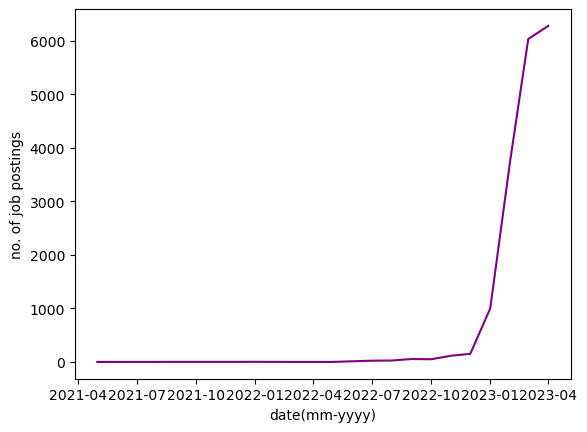

In [308]:
df2=df.groupby('month_year').size().reset_index()


sns.lineplot(x=df2['month_year'], y=df2[0], color='purple')
plt.xlabel("date(mm-yyyy)")
plt.ylabel("no. of job postings")
plt.show()

In [207]:
#top hiring industries

df3=df.groupby('industry').size().reset_index(name='count').sort_values(by='count',ascending=False)[0:10]
df3

,industry,count
672,"Technology, Information and Internet",2296
294,IT Services and IT Consulting,1838
669,Staffing and Recruiting,1793
628,Software Development,960
427,Internet Publishing,764
225,Financial Services,479
3,Advertising Services,478
110,Business Consulting and Services,318
289,Human Resources Services,263
266,Government Administration,242


[Text(0.5, 1.0, 'Top 10 industries with most job openings')]

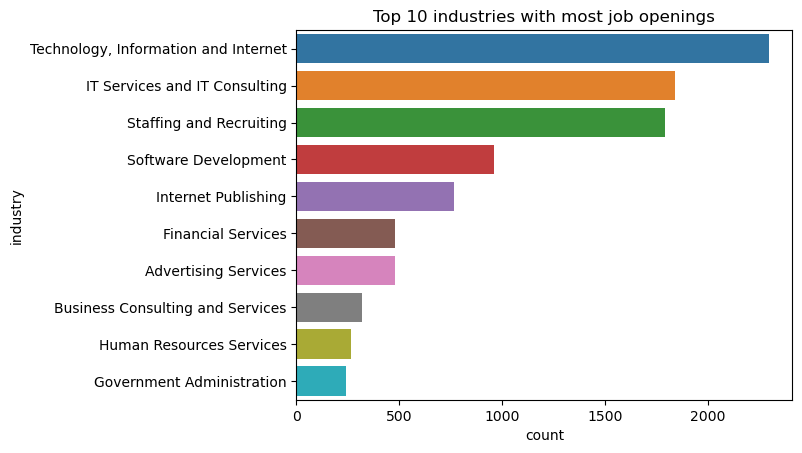

In [220]:
sns.barplot(df3,y='industry',x='count').set(title='Top 10 industries with most job openings')

In [270]:
#job locations with most job openings

df4=df.groupby('location').size().reset_index(name='count').sort_values(by='count',ascending=False)[:20]
df4.reset_index(drop=True)

,location,count
0,"Bengaluru, Karnataka, India",1539
1,"London, England, United Kingdom",1384
2,"Mumbai, Maharashtra, India",1083
3,"Pune, Maharashtra, India",561
4,"Sydney, New South Wales, Australia",559
5,"Melbourne, Victoria, Australia",408
6,"Chennai, Tamil Nadu, India",352
7,"Bengaluru North, Karnataka, India",344
8,"Indianapolis, IN",269
9,"San Francisco, CA",265


<Axes: >

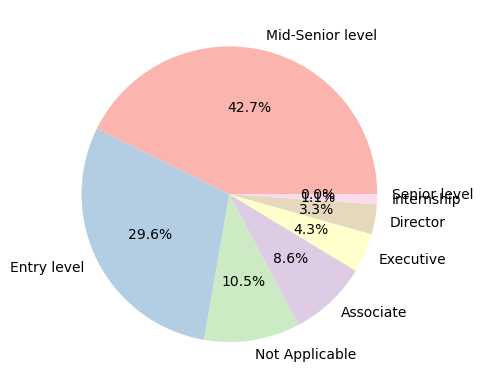

In [286]:
# Analysing most demanded experience level
df['seniority_level'].value_counts().plot(kind='pie',
                                          autopct='%1.1f%%',ylabel='',
                                          cmap='Pastel1')


# Conclusions

1) Graphic designer and software engineer positions are the most in-demand job profiles. 

2) Among the cities, Bangalore and London stand out with the highest number of job openings. Additional analysis could reveal the specific job roles prevalent in different cities.

3) The companies with the highest hiring activity include Diverse Lynx, Acme Services, IBM, and Michael Page.

4) The leading industries in terms of hiring activity are Technology, Information and Internet, IT Services and IT Consulting, as well as Staffing and Recruiting.

5) The job market exhibits highest demand on individuals with mid-senior level experience, followed by those with entry-level experience. Collectively, these two categories account for approximately 72% of the data in this LinkedIn dataset.